# Milestone 2
## 1. Gathering the data

As mentioned in the previous Milestone, answering our research questions related to the modal organization of Chinese Folk Songs (hereafter CFS) across China requires a dataset of CFS with the following properties:
1. The CFS must come from diverse regions of China
2. The origin of each song must be annotated
3. If possible, the tonic of each song should be annotated

By simply querying these information on a search engine, we found the [Essen Folksong Database](http://www.esac-data.org/). This database contains more than 20'000 scores of folksongs, of which approximately 2250 come from China. This dataset is particularly interesting as it contains the regional information required to answer our research questions. Indeed, not only are the Chinese scores classified into 4 distinct geographical regions (Han, Natmin, Shanxi, Xinhua), which shows diversity in their origins, but each piece also contains a more precise provenance (the province or city). Moreover, each song is annotated with its tonic, though it is unclear whether the annotation is manual or if it has been infered by a software *(is it ?)*. Therefore, as this dataset fullfils the three criteria above, it is well suited for our project. We can easily download all the relevant data of the Essen Collection from the [KernScore database](https://kern.humdrum.org/cgi-bin/browse?l=essen/asia/china) as a ZIP file. 



*Questions not answered yet :*
- What aspects of the researched phenomena does the data (not) represent?
- What is the maximum available amount in theory (in the case of incomplete data acquisition)?
- If working on partial data, how representative is your sample for the full dataset?


## 2. Data format

Originally, the Essen Folksong Database is in a particular format that is inspired by the *Jianpu* notation. While it may have been interesting to work with this format to analyze CFS, a translation of this database has been made in \*\*kern format which we will use for simplicity reasons. In \*\*kern files, the information is encoded as... *(here answer : How is the information that the dataset represents encoded in this format?)*

\*\*kern files can be read in Python using the *music21* module, which can be easily installed via *pip*. We can first load the module:

In [63]:
from music21 import *
#NOTE TO RAVI AND ZIJUN : This is the MuseCore path on my Computer, you will need to download MuseScore and to specify the path yourself
environment.set('musescoreDirectPNGPath', 'C:\\Program Files\\MuseScore3\\bin\\MuseScore3.exe')

Let's load one song from the regional category *Han* and display it

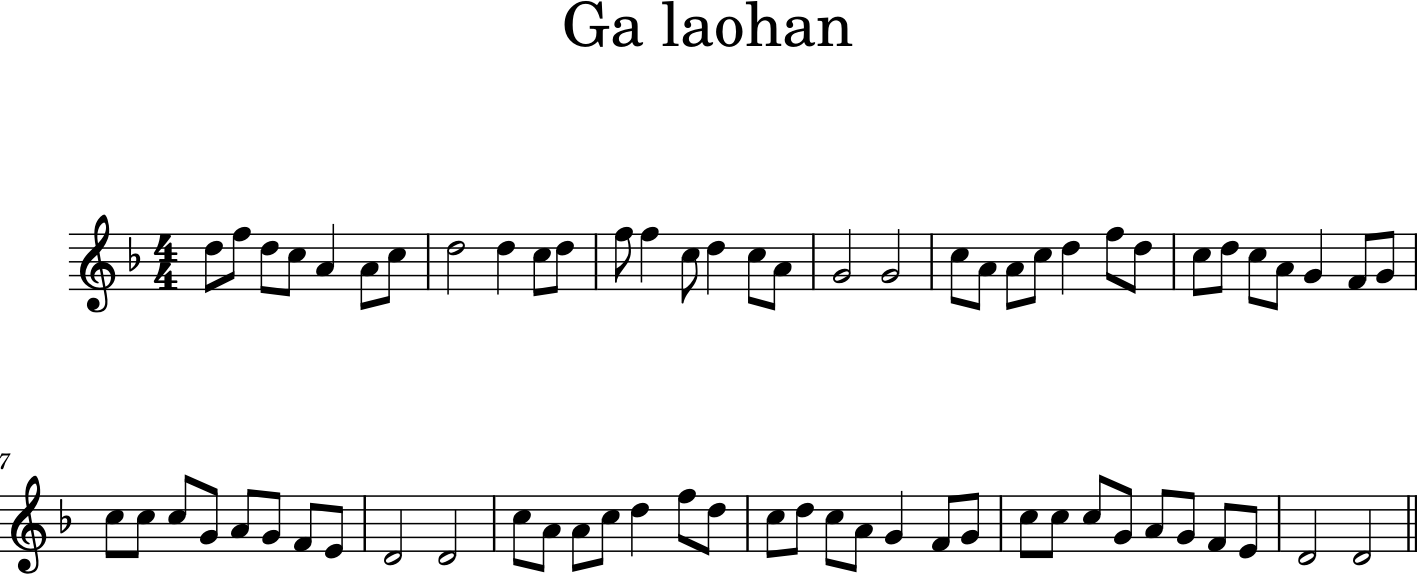

In [65]:
score = converter.parse("data/han/han0111.krn")
score.show()

First, we are interested in the origin of the song. Apart from the regional category (*Han*), the more precise origin of the song is contained in a `GlobalReference` with the code `ARE`. One way to access it is to iterate over all the elements and only print it if it is an element of that type with the correct code

In [9]:
for element in score:
    if type(element) is humdrum.spineParser.GlobalReference and element.code == "ARE":
        print(element.value)

Asia, China,ÿQinghai, Osten


As our analysis will rely on scale degrees, we will need to access the pitches and their durations as well as the tonic. The following snippet allows us to access all the notes of the first measure and the tonic of the piece.

In [69]:
for part in score.parts:
    for element in part.measure(0):
        if type(element) is key.Key:
            print(f"The tonic is : {element.tonic}")
        if type(element) is note.Note:
            print(element.pitch, element.duration.quarterLength)

The tonic is : F
D5 0.5
F5 0.5
D5 0.5
C5 0.5
A4 1.0
A4 0.5
C5 0.5
